In [1]:
import construction as cs
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


import dynamic_metrics as ds


import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'




%load_ext autoreload
%autoreload 2

In [3]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    path = "../variation_of_K_res/"+file_name+".dat"
    gap = 299 
    data_in = cs.load_data(path)
    graphs_in = cs.build_graphs(data_in,gap=gap)
    
    return graphs_in

In [4]:
import os 

In [5]:
ks = [2,4,6,7,8,9,10,12,14,20,25,50]
graphs = dict()
for i in ks:
    file_name = "ETNgen-InVS13-k-"+str(i)
    graphs[i] = load_ETNgen_graph(file_name)
    
    
    

In [6]:
orig_graph = load_origin_graph("InVS13")

In [23]:
import os

path = "../variation_of_K_res/dynamic_results"
COV = path+"/coverage"
MFPTs = path+"/MFPT"

if not os.path.exists(path):
    os.makedirs(path)
    os.makedirs(COV)
    os.makedirs(MFPTs)

# coverage

k volte, con n0 e t0 random

In [24]:
from scipy.stats import ks_2samp

In [25]:
K = 1000
T = 500
c_mio = dict()
c_orig = ds.coverage(orig_graph,K,T)
c_stab = ds.coverage(orig_graph,K,T)
for k,etn in graphs.items():
    print(k)
    c_mio[k] = ds.coverage(etn,K,T)
print("ETN done")

2
4
6
7
8
9
10
12
14
20
25
50
ETN done


In [26]:

print("coverage")
print("orig vs sta \t",ks_2samp(c_orig, c_stab)[0])
for k,v in c_mio.items():
    print("orig vs k="+str(k)+" \t",ks_2samp(c_orig, v)[0])

coverage
orig vs sta 	 0.041
orig vs k=2 	 0.13
orig vs k=4 	 0.093
orig vs k=6 	 0.087
orig vs k=7 	 0.098
orig vs k=8 	 0.096
orig vs k=9 	 0.093
orig vs k=10 	 0.09
orig vs k=12 	 0.13
orig vs k=14 	 0.221
orig vs k=20 	 0.309
orig vs k=25 	 0.748
orig vs k=50 	 0.742


In [22]:
COV

'../variation_of_K_res/dynamic_results//coverage'

In [27]:
np.save(COV+"/stab",c_stab)
np.save(COV+"/orig",c_orig)
for k,v in c_mio.items():
    np.save(COV+"/etn-k"+str(k),v)

# MFPT

In [28]:
MFPTs

'../variation_of_K_res/dynamic_results/MFPT'

In [30]:
K = 1
m_ori = ds.MFPT(orig_graph,K)
m_ori2 = [x for x in m_ori if x < max(m_ori)-10]
print(1)
m_stb = ds.MFPT(orig_graph,K)
m_stb2 = [x for x in m_stb if x < max(m_ori)-10]

print(2)

1
2


In [31]:
m_mio = dict()
for k,etn in graphs.items():
    print(k)
    tmp = ds.MFPT(etn,K)
    tmp = [x for x in tmp if x < max(m_ori)-10] 
    m_mio[k] = tmp

2
4
6
7
8
9
10
12
14
20
25
50


In [32]:

print("coverage")
print("orig vs sta \t",ks_2samp(m_ori2, m_stb2)[0])
for k,v in m_mio.items():
    print("orig vs k="+str(k)+" \t",ks_2samp(m_ori2, v)[0])

coverage
orig vs sta 	 0.032803460877079735
orig vs k=2 	 0.09047284644194757
orig vs k=4 	 0.08655973925722618
orig vs k=6 	 0.07737492558582122
orig vs k=7 	 0.08193214461622883
orig vs k=8 	 0.07526786137581189
orig vs k=9 	 0.07259419404028009
orig vs k=10 	 0.08074021943992442
orig vs k=12 	 0.09483708117208806
orig vs k=14 	 0.08050453358691391
orig vs k=20 	 0.07807548256986459
orig vs k=25 	 0.9555243445692884
orig vs k=50 	 0.9241573033707865


In [33]:
MFPTs

'../variation_of_K_res/dynamic_results/MFPT'

In [34]:
np.save(MFPTs+"/stab",m_stb2)
np.save(MFPTs+"/orig",m_ori2)

for k,v in m_mio.items():
    np.save(MFPTs+"/etn-k"+str(k),v)

# SIR model

In [35]:
import os


path = "../variation_of_K_res/dynamic_results"
R0 = path+"/R0/"
la025 = R0+"la025"
la015 = R0+"la015"
la001 = R0+"la001"
if not os.path.exists(la001):
    os.makedirs(la025)
    os.makedirs(la015)
    os.makedirs(la001)
path

'../variation_of_K_res/dynamic_results'

In [36]:
for lambd in [0.25,0.15,0.01]:
    mu =0.005
    K = 100


    if lambd == 0.25:
        la = la025
    if lambd == 0.15:
        la = la015
    if lambd == 0.01:
        la = la001

    print("R0 lambda",lambd,mu)
    r_ori = ds.compute_r0(K,orig_graph,lambd,mu)
    r_sta = ds.compute_r0(K,orig_graph,lambd,mu)
    
    r_etn = dict()
    
    for k,etn in graphs.items():
        r_etn[k] = ds.compute_r0(K,etn,lambd,mu)
        print(k)
        
        
    print("orig vs sta \t",ks_2samp(r_ori, r_sta)[0])
    
    for k,res_etn in r_etn.items():
        print("orig vs k = "+str(k)+" \t",ks_2samp(r_ori, res_etn)[0])
        np.save(la+"/etn_k"+str(k),res_etn)

    np.save(la+"/stab",r_sta)
    np.save(la+"/orig",r_ori)

R0 lambda 0.25 0.25
2
4
6
7
8
9
10
12
14
20
25
50
orig vs sta 	 0.08
orig vs k = 2 	 0.11
orig vs k = 4 	 0.08
orig vs k = 6 	 0.17
orig vs k = 7 	 0.16
orig vs k = 8 	 0.11
orig vs k = 9 	 0.1
orig vs k = 10 	 0.09
orig vs k = 12 	 0.14
orig vs k = 14 	 0.18
orig vs k = 20 	 0.17
orig vs k = 25 	 0.32
orig vs k = 50 	 0.24
R0 lambda 0.15 0.15
2
4
6
7
8
9
10
12
14
20
25
50
orig vs sta 	 0.09
orig vs k = 2 	 0.07
orig vs k = 4 	 0.09
orig vs k = 6 	 0.1
orig vs k = 7 	 0.13
orig vs k = 8 	 0.11
orig vs k = 9 	 0.1
orig vs k = 10 	 0.09
orig vs k = 12 	 0.11
orig vs k = 14 	 0.12
orig vs k = 20 	 0.11
orig vs k = 25 	 0.21
orig vs k = 50 	 0.28
R0 lambda 0.01 0.01
2
4
6
7
8
9
10
12
14
20
25
50
orig vs sta 	 0.0
orig vs k = 2 	 0.0
orig vs k = 4 	 0.01
orig vs k = 6 	 0.02
orig vs k = 7 	 0.02
orig vs k = 8 	 0.0
orig vs k = 9 	 0.04
orig vs k = 10 	 0.03
orig vs k = 12 	 0.03
orig vs k = 14 	 0.04
orig vs k = 20 	 0.06
orig vs k = 25 	 0.06
orig vs k = 50 	 0.07


# plot

In [121]:
ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal


import os

def load_cov(ks = [2,4,6,7,8,9,10,12,14,20,25,50]):
    
    ori = np.load("../variation_of_K_res/dynamic_results/coverage/orig.npy")
    stb = np.load("../variation_of_K_res/dynamic_results/coverage/stab.npy")
    
    etn = dict()
    for k in ks:
        etn[k] = np.load("../variation_of_K_res/dynamic_results/coverage/etn-k"+str(k)+".npy")
        
    return ori,stb,etn

def load_mfpt(ks = [2,4,6,7,8,9,10,12,14,20,25,50]):
    
    ori = np.load("../variation_of_K_res/dynamic_results/MFPT/orig.npy")
    stb = np.load("../variation_of_K_res/dynamic_results/MFPT/stab.npy")
    
    etn = dict()
    for k in ks:
        etn[k] = np.load("../variation_of_K_res/dynamic_results/MFPT/etn-k"+str(k)+".npy")
        
    return ori,stb,etn

def load_r0(ks = [2,4,6,7,8,9,10,12,14,20,25,50],lambd="la001"):
    
    ori = np.load("../variation_of_K_res/dynamic_results/R0/"+lambd+"/orig.npy")
    stb = np.load("../variation_of_K_res/dynamic_results/R0/"+lambd+"/stab.npy")
    
    etn = dict()
    for k in ks:
        etn[k] = np.load("../variation_of_K_res/dynamic_results//R0/"+lambd+"/etn_k"+str(k)+".npy")
        
    return ori,stb,etn


def compute_ks_cov_mfpt(cov,mfpt):
    
    mfpt_ms = [ks_2samp(mfpt[0],mfpt[1])[0]]
    cov_ms = [ks_2samp(cov[0],cov[1])[0]]
    
    cov_etn = cov[2]
    mfpt_etn = mfpt[2]
    
    for k in cov_etn:
        cetn = cov_etn[k]
        metn = mfpt_etn[k]
        
        cov_ms.append(ks_2samp(cov[0],cetn)[0])
        mfpt_ms.append(ks_2samp(mfpt[0],metn)[0])
        
    return cov_ms,mfpt_ms



from matplotlib.patches import Patch
from matplotlib.lines import Line2D


def plot_cov_mfpt(ax,ks= [2,4,6,8,10,25,50],legend=False):
    
    ax.set_ylabel("KS distance")
        
    cov = load_cov(ks)
    mfpt = load_mfpt(ks)
    
    x = np.arange(2)
    cov_ms, mfpt_ms = compute_ks_cov_mfpt(cov,mfpt)
    x1 = np.array([cov_ms[0],mfpt_ms[0]])
    x2 = np.array([cov_ms[1],mfpt_ms[1]])
    x3 = np.array([cov_ms[2],mfpt_ms[2]])
    x4 = np.array([cov_ms[3],mfpt_ms[3]])
    x5 = np.array([cov_ms[4],mfpt_ms[4]])
    x6 = np.array([cov_ms[5],mfpt_ms[5]])
    x7 = np.array([cov_ms[6],mfpt_ms[6]])

    
    width = 0.1
    rects1 = ax.bar(x - 0.25, x2, width, label='k = 4',color="#fc8e69")
    rects4 = ax.bar(x - 0.15, x3, width, label='k = 6',color="#fb7041")
    rects5 = ax.bar(x - 0.05, x4, width, label='k = 8',color="#fa551e")
    rects4 = ax.bar(x + 0.05 , x5, width, label='k = 10',color="#e13c05")
    rects4 = ax.bar(x + 0.15 , x6, width, label='k = 25',color="#af2e04")
    rects4 = ax.bar(x + 0.25 , x7, width, label='k = 50',color="#7d2103")
    
    
    ax.plot([-0.45,0.45],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
              
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')    
    
    labels = ["Coverage","MFPT"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    
    
def compute_ks_r0(la25,la15,la01):
    orig_25 = la25[0]
    orig_15 = la15[0]
    orig_01 = la01[0]
    
    res = [[[ks_2samp(la25[0], la25[1])[0]],[ks_2samp(la15[0], la15[1])[0]],[ks_2samp(la01[0], la01[1])[0]]]]
    
    etn_25 = la25[2]
    etn_15 = la15[2]
    etn_01 = la01[2]
    
    for k in etn_01:
        tmp_25 = etn_25[k]
        tmp_15 = etn_15[k]
        tmp_01 = etn_01[k]
        
        
        ks_25 = ks_2samp(orig_25,tmp_25)[0]
        ks_15 = ks_2samp(orig_15,tmp_15)[0]
        ks_01 = ks_2samp(orig_01,tmp_01)[0]
        
        res.append(np.array([ks_25,ks_15,ks_01]))
        
    return res

def plot_r0(ax,ks,legend=False):
    
    ax.set_ylabel("KS distance")
    r0_025 = load_r0(ks,"la025")
    r0_015 = load_r0(ks,"la015")
    r0_001 = load_r0(ks,"la001")
    x1,x2,x3,x4,x5,x6,x7,x8 = compute_ks_r0(r0_025,r0_015,r0_001)
    x = np.arange(3)
    width = 0.1
    
    rects1 = ax.bar(x - 0.25, x2, width, label='k = 4',color="#fc8e69")
    rects2 = ax.bar(x - 0.15, x3, width, label='k = 6',color="#fb7041")
    rects3 = ax.bar(x - 0.05, x4, width, label='k = 8',color="#fa551e")
    rects4 = ax.bar(x + 0.05 , x5, width, label='k = 10',color="#e13c05")
    rects5 = ax.bar(x + 0.15 , x6, width, label='k = 25',color="#af2e04")
    rects6 = ax.bar(x + 0.25 , x7, width, label='k = 50',color="#7d2103")
    
    ax.plot([-0.45,0.45],[x1[0],x1[0]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([2-0.45,2.45],[x1[2],x1[2]],linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
          
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.set_facecolor('#EFEFEF')
    #ax.xaxis.grid(False)
    
    ax.yaxis.grid(True, color='lightgrey')
    ax.xaxis.grid(False)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    

    labels = [r"$\lambda$ = 0.25",r"$\lambda$ = 0.15",r"$\lambda$ = 0.01"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)

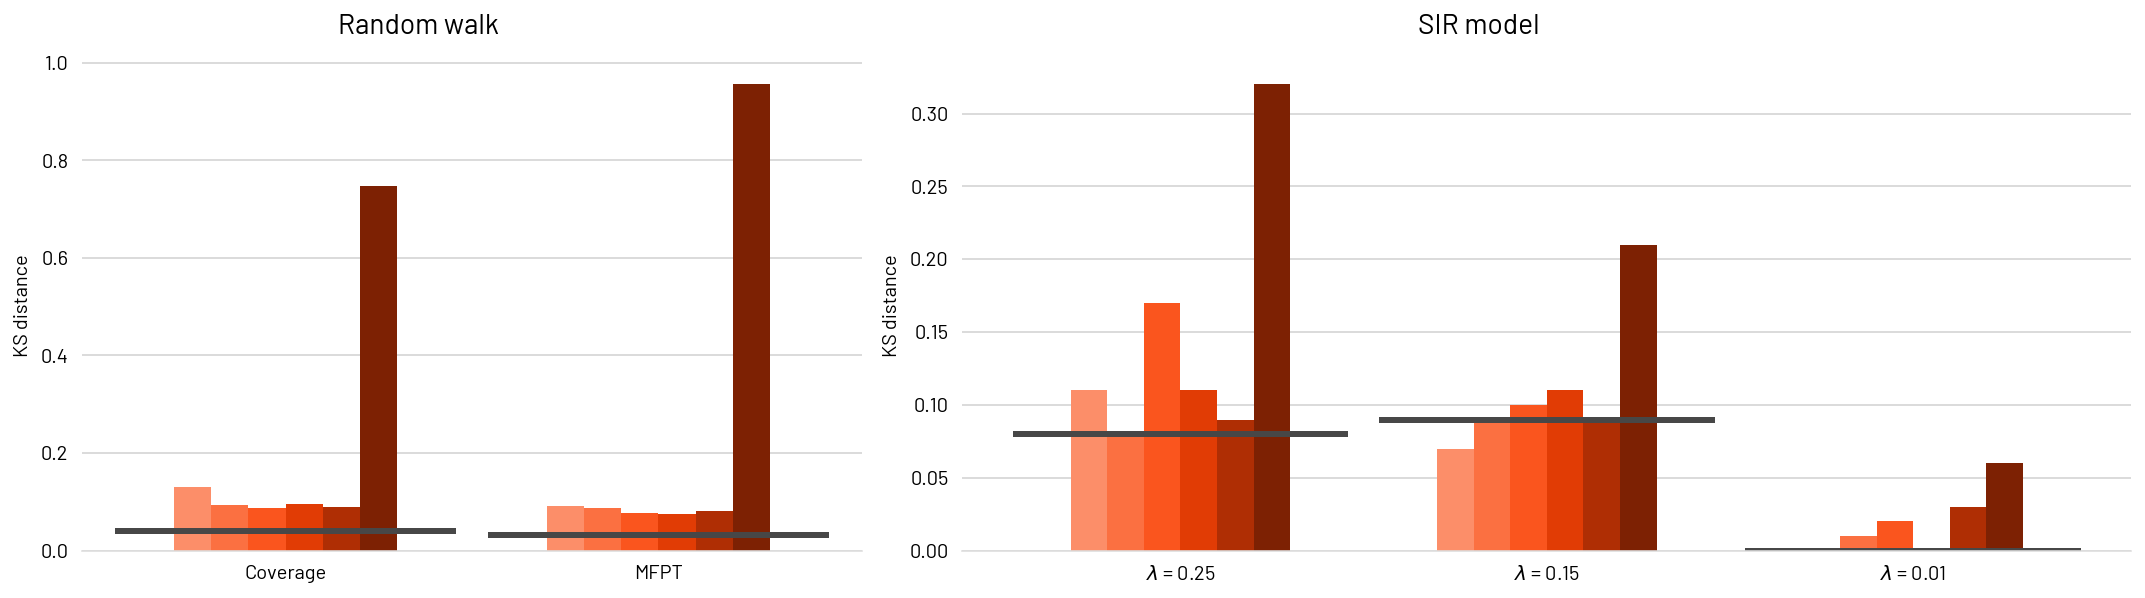

In [122]:
ks= [2,4,6,8,10,25,50]

fig, ax = plt.subplots(1,2, figsize=(15,4), gridspec_kw={'width_ratios': [2, 3]})
fig.tight_layout(h_pad=1,w_pad=0)


fig.text(0.16, 1, 'Random walk',fontdict={'size':14})
fig.text(0.66, 1, 'SIR model',fontdict={'size':14})

plot_cov_mfpt(ax[0],ks)
plot_r0(ax[1],ks,legend=True)


fig.tight_layout()
plt.savefig("../variation_of_K_res/dynamic_varing_k.pdf")


# nb interactions 

In [125]:
import numpy as np
def nb_interactions(graphs):
    res = []
    for g in graphs:
        res.append(len(g.edges()))
    return(res)
def moving_average(x, w=10):
    return np.convolve(x, np.ones(w), 'valid') / w


In [216]:
import numpy as np
def nb_interactions(graphs):
    res = []
    for g in graphs:
        res.append(len(g.edges()))
    return(res)
def moving_average(x, w=30):
    return np.convolve(x, np.ones(w), 'valid') / w


from matplotlib.patches import Patch
from matplotlib.lines import Line2D



def plot_nb_inter_one_axes(ax,orig_graphs,etn_gen,legend=False,line_width=1.5):
    
    

    tmp = moving_average(nb_interactions(orig_graphs))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color=ORIGINAL_COLOR,label="Original", lw=line_width)
    colors = ["#fc8e69","#fb7041","#fa551e","#e13c05","#af2e04","#7d2103"]
    cc = 0
    for k,etn in etn_gen.items():
        tmp = moving_average(nb_interactions(etn))
        x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
        ax.plot(x,tmp,color=colors[cc],alpha=0.8,label="k ="+str(k), lw=line_width)
        cc = cc + 1 
    
    #ax.set_xlabel("Timestamps")
    ax.set_ylabel("Number of interactions")
    ax.set_title("Workplace varing k")

    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    #ax.yaxis.grid(True, color='#FFFFFF')
    ax.yaxis.grid(True, color='lightgrey')
    #ax.set_facecolor('#EFEFEF')
    ax.xaxis.grid(False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],labels=["day 0","day 1","day 2","day 3","day 4",
          "day 5","day 6","day 7","day 8","day 9","day 10","day 11"],rotation=45)
    
    
    plt.tick_params(bottom=False, right=False,left=False)
    plt.gca().spines['top'].set_color('#DDDDDD')
    plt.gca().spines['right'].set_color('#DDDDDD')
    plt.gca().spines['left'].set_color('#DDDDDD')
    plt.gca().spines['bottom'].set_color('#DDDDDD')
    plt.gca().set_axisbelow(True)
    #plt.gca().yaxis.grid(True, color='#FFFFFF')
    #plt.gca().set_facecolor('#EFEFEF')

    
    plt.gca().yaxis.grid(True, color='lightgrey')
    plt.gca().xaxis.grid(False)


In [196]:
ks = [4,6,8,10,25,50]
graphs = dict()
for i in ks:
    file_name = "ETNgen-InVS13-k-"+str(i)
    graphs[i] = load_ETNgen_graph(file_name)
    
    
orig_graph = load_origin_graph("InVS13")

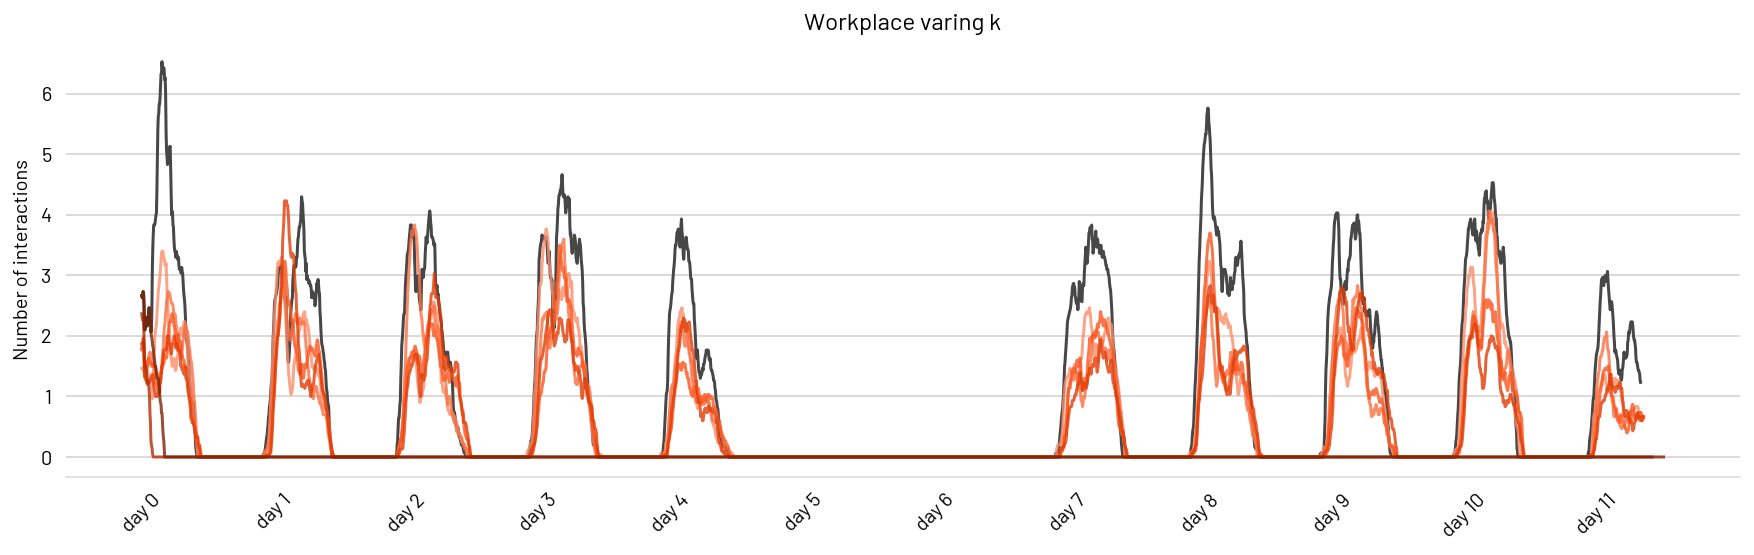

In [217]:
figure, axes = plt.subplots(nrows=1, ncols=1,figsize=(15,4))
plot_nb_inter_one_axes(axes,orig_graph,graphs)


fig.tight_layout()
plt.savefig("../variation_of_K_res/nb_interacions_varing_K.pdf", bbox_inches = 'tight')
plt.show()

In [164]:
labels = [(item.get_text()) for item in ax.get_xticklabels()]

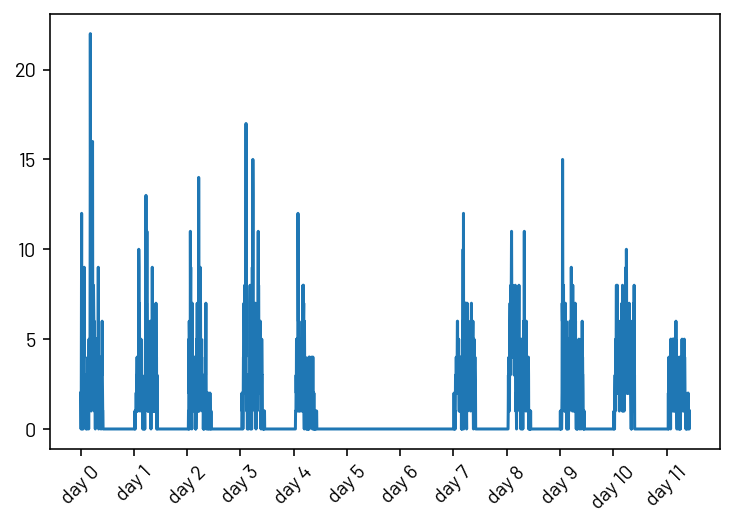

In [194]:
tmp = nb_interactions(orig_graph)
x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
plt.plot(x,tmp)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],
plt.show()

array([0.00000000e+00, 3.47222222e-03, 6.94444444e-03, ...,
       1.14236111e+01, 1.14270833e+01, 1.14305556e+01])

0.0034722222222222225